In [1]:
import torch
import torch.nn as nn

In [ ]:
from grouper.percept import GroupNet

channel_dim = 3
resolution = (64,64)
feature_dim = 128

net = GroupNet(channel_dim = channel_dim, resolution = resolution, backbone_feature_dim = feature_dim)

from grouper.affinity import ObjectAffinityCalculator
aff = ObjectAffinityCalculator(3, 128)

torch.Size([5, 339968, 1])


IndexError: The shape of the mask [5, 339968, 1] at index 1 does not match the shape of the indexed tensor [3, 5, 4096, 83] at index 2

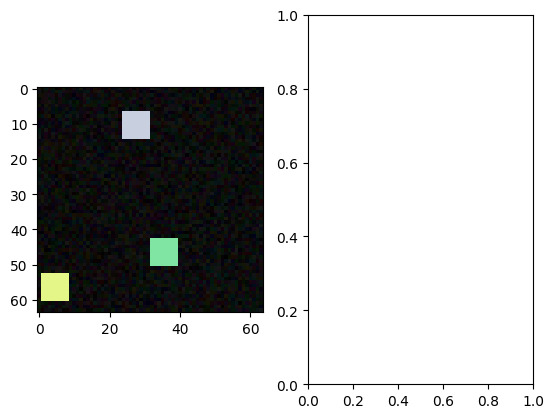

In [4]:
from data import MovingSpritesDataset
from torch.utils.data import Dataset, DataLoader

dataset = MovingSpritesDataset(img_size = resolution[0])
loader = DataLoader(dataset, batch_size = 5, shuffle = True)
for sample in loader:
    break
sample = sample[:,0,:,:,:]
target = torch.randn([5,64,64]) > 1.5
#target = None

import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(sample[0,:,:,:].permute(1,2,0))
plt.subplot(122)
#if target is not None:plt.imshow(target[0])



outputs = net(sample, aff, target_masks = target)

print("loss:" , outputs["loss"])